In [1]:
from tensorflow import keras

In [1]:
from scipy.interpolate import griddata

import matplotlib.pyplot  as plt

from matplotlib import cm
from collections import OrderedDict
from colorspacious import cspace_converter
cmaps=OrderedDict()
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
    
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

###Les données 

import tensorflow as tf
import numpy as np
import scipy.io
import time
import sys
import os
from tensorflow import keras






path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/data_pas_1_23_04.mat'
#path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/run_200_450_piv0.mat'
def data_regression_rho(path_data,t1,t2,proportion):
    data = scipy.io.loadmat(path_data)
    t_star = data['t'].reshape([-1,1])[t1:t2]# T x 1
    x_star = data['x'][:,t1:t2] # N x 1
    y_star = data['y'][:,t1:t2] # N x 1

    
    T = t_star.shape[0]
    print(T)
    N = x_star.shape[0]
    print(N)
    Rho_star = data['Densite'][:,t1:t2]
    T_star = np.tile(t_star, (1,N)).T
    print(T_star.shape)
    X_star = x_star 
    Y_star = y_star 
    T_data = T # int(sys.argv[1])
    N_data = N # int(sys.argv[2])
    ind_t = np.random.randint(T_data,size = T_data)
    ind_x = np.random.randint(N_data, size = int(N_data*proportion))
    print(ind_t.shape)
    t_data = T_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    x_data = X_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    y_data = Y_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    rho_data = Rho_star[ind_x, :][:,ind_t].flatten().reshape(-1,1)
    
    return t_data,x_data,y_data,rho_data

t_data, x_data, y_data, rho_data = data_regression_rho(path_data,0,300,1)
inp_grad=np.concatenate([x_data,y_data,t_data],1)
inp_train = inp_grad

data_X = [inp_grad,inp_train]
data_Y = [rho_data]

300
15353
(15353, 300)
(300,)


In [3]:
layers = []
layer1 = keras.layers.BatchNormalization()
layer2 = keras.layers.Dense(250,activation = 'elu',kernel_initializer = 'glorot_normal')
layer3 = keras.layers.Dropout(0.2)
layer4 = keras.layers.BatchNormalization()
layer5 = keras.layers.Dense(250,activation = 'elu',kernel_initializer = 'glorot_normal')
layer6 = keras.layers.Dropout(0.2)
layer7 = keras.layers.Dense(1) 



model = keras.Sequential([layer1,layer2,layer3,layer4,layer5,layer6,layer7])



In [19]:
optimizer = keras.optimizers.Adam(lr = 1e-5)
loss = 'MSE'

In [20]:
model.compile(loss = loss, optimizer = optimizer)

In [21]:
model.fit(inp_train, rho_data, batch_size = 8192,epochs = 350)

Epoch 1/350
563/563 [==============================] - 2s 4ms/step - loss: 4.2521e-05
Epoch 2/350
563/563 [==============================] - 2s 4ms/step - loss: 4.2449e-05
Epoch 3/350
338/563 [=================>............] - ETA: 0s - loss: 4.2783e-05

KeyboardInterrupt: 

In [22]:

path_save = '/media/delcey1/Elements/these/Re 2000/datafiltre_piv_01.mat'
path_save2 = '/home/delcey1/Documents/Re 2000'
path_data = '/media/delcey1/Elements/these/GRAVITY_CURRENTS/DATA/DATA_20_04/data_pred_pas_4_23_04.mat'

data = scipy.io.loadmat(path_data)

t_star = data['t'].reshape([-1,1])[0:] # T x 1
x_star = data['x'].reshape([-1,1]) # N x 1
y_star = data['y'].reshape([-1,1]) # N x 1





T = t_star.shape[0]
N = x_star.shape[0]
    
    # Rearrange Data 
T_star = np.tile(t_star, (1,N)).T # N x T
X_star = np.tile(x_star, (1,T)) # N x T
Y_star = np.tile(y_star, (1,T)) # N x T




Rho_star = data['Densite'][:,0:]#N x T


t_test = T_star[:,230].flatten().reshape(-1,1)
x_test = X_star[:,230].flatten().reshape(-1,1)
y_test = Y_star[:,230].flatten().reshape(-1,1)
X= np.concatenate([x_test,y_test,t_test],1)
pred = model.predict(X)


py,px = data['pixel_xy'][0,0],data['pixel_xy'][0,1]


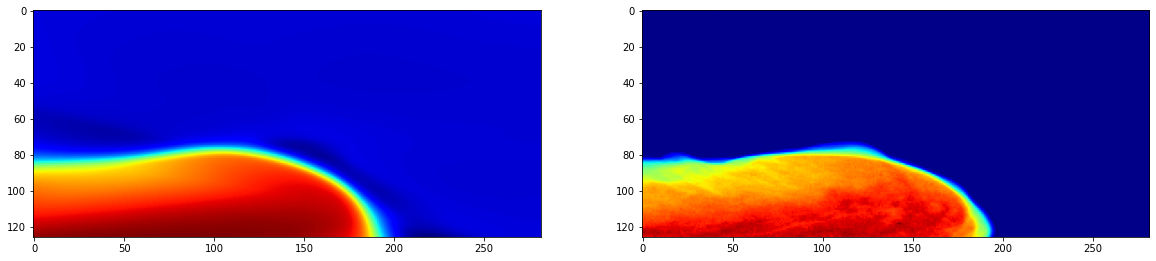

In [23]:
fig, (ax,ax1) =plt.subplots(ncols = 2, figsize = (20,12))
ax.imshow(pred.reshape(py,px),cmap = cmaps['Miscellaneous'][13])
ax1.imshow(Rho_star[:,230].reshape(py,px),cmap = cmaps['Miscellaneous'][13])
plt.show()

In [24]:
list_rho_pred = []


for i in range(T_star.shape[1]):
    t_test = T_star[:,i].flatten().reshape(-1,1)
    x_test = X_star[:,i].flatten().reshape(-1,1)
    y_test = Y_star[:,i].flatten().reshape(-1,1)
    X= np.concatenate([x_test,y_test,t_test],1)
    pred = model.predict_step(X).numpy()
    list_rho_pred.append(pred)



py,px = data['pixel_xy'][0,0],data['pixel_xy'][0,1]

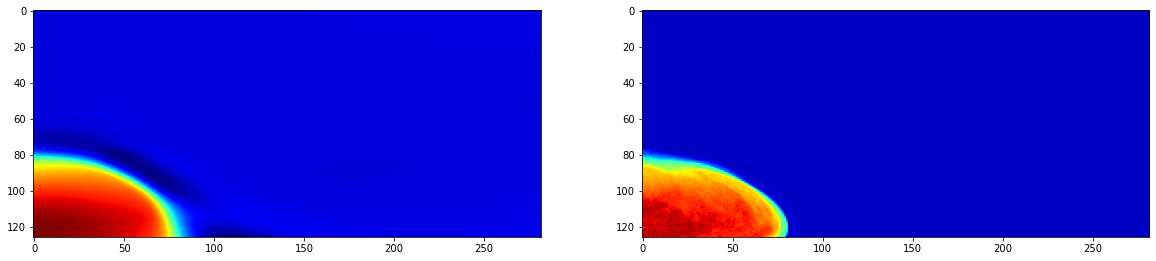

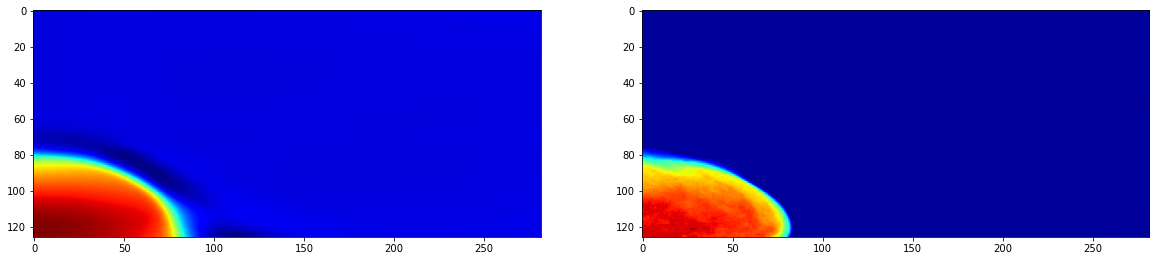

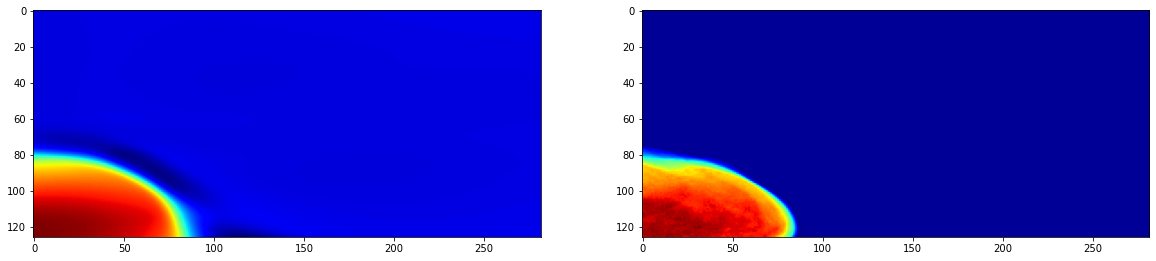

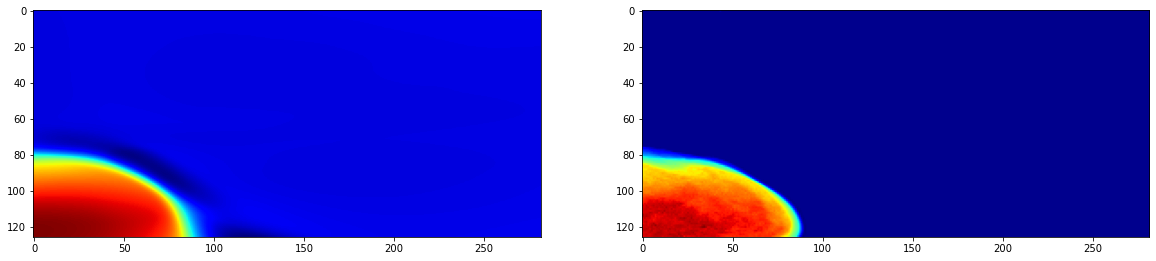

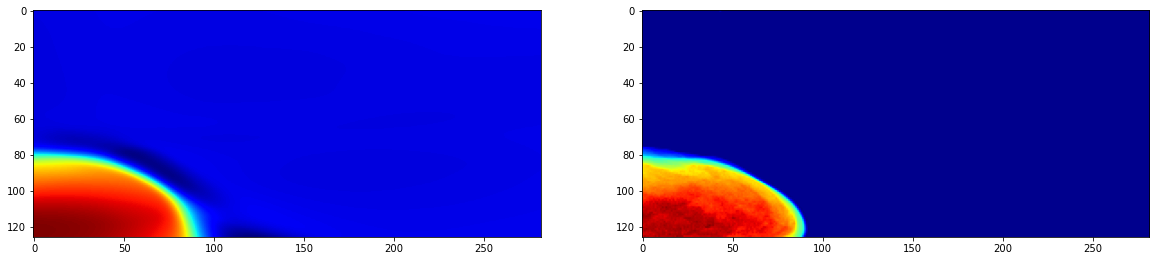

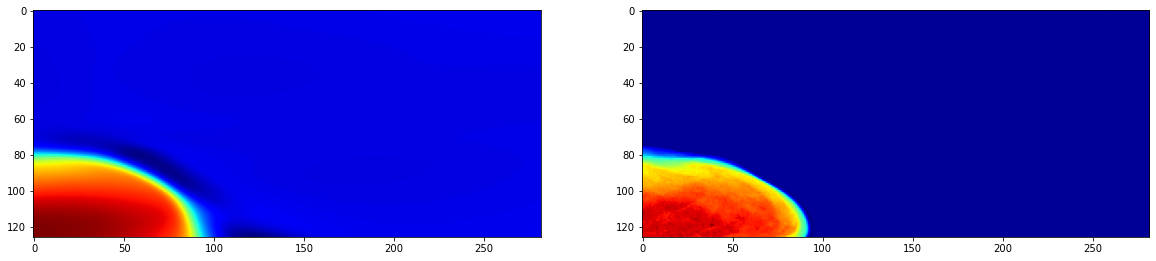

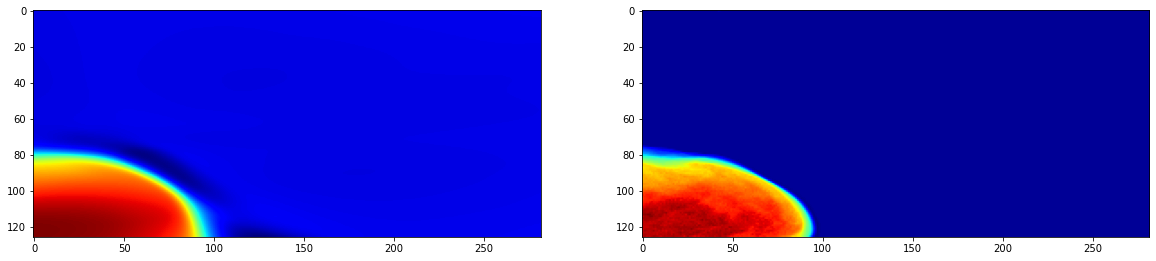

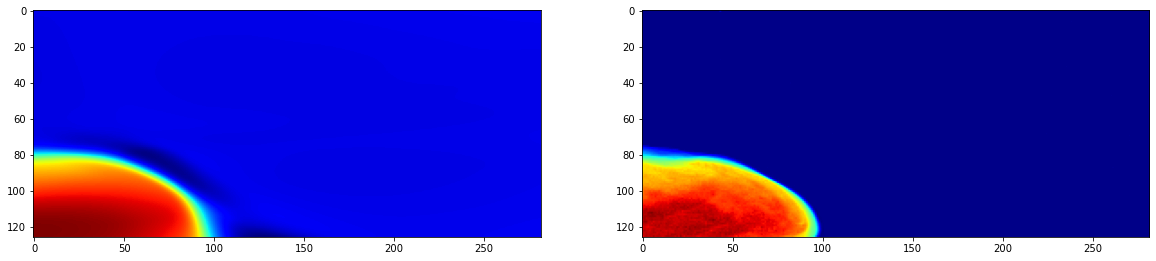

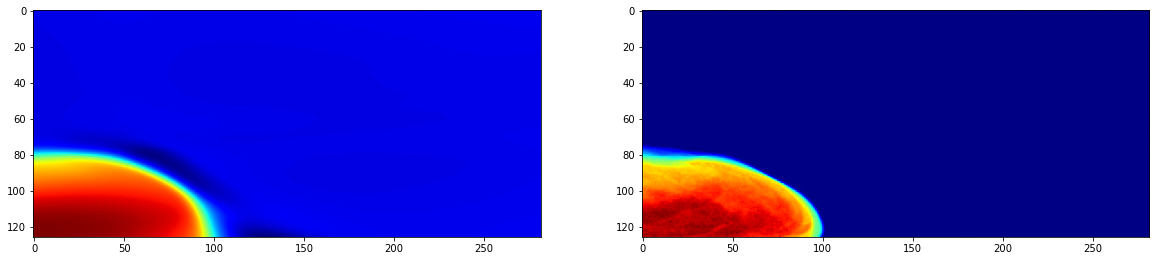

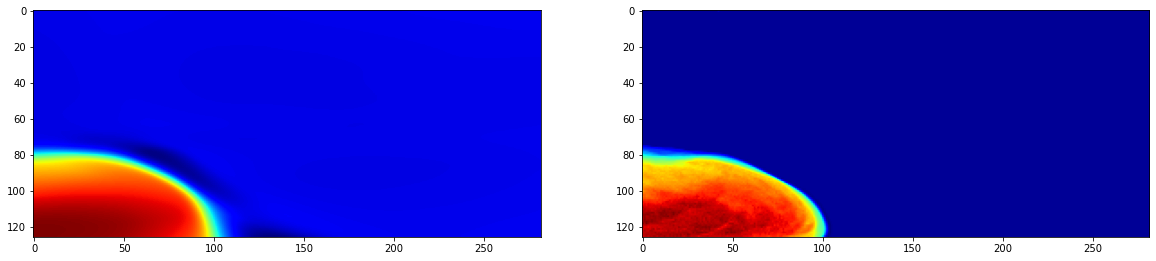

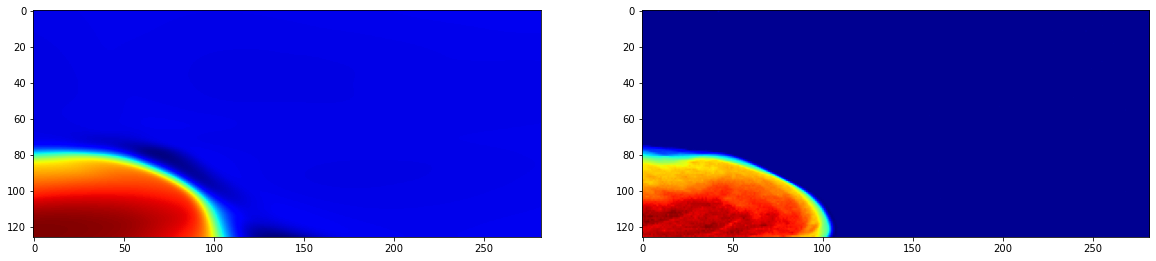

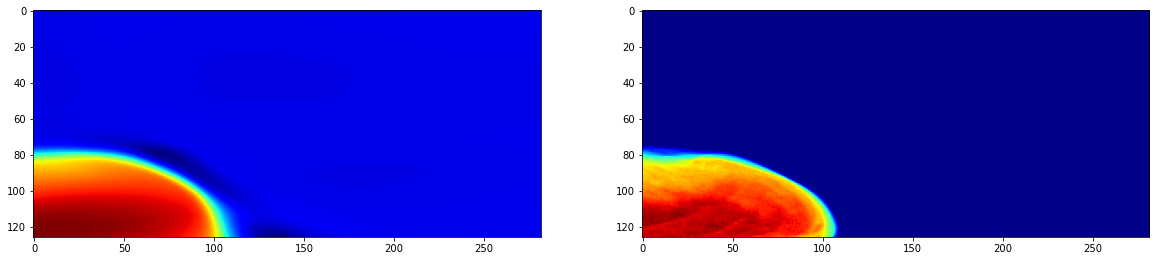

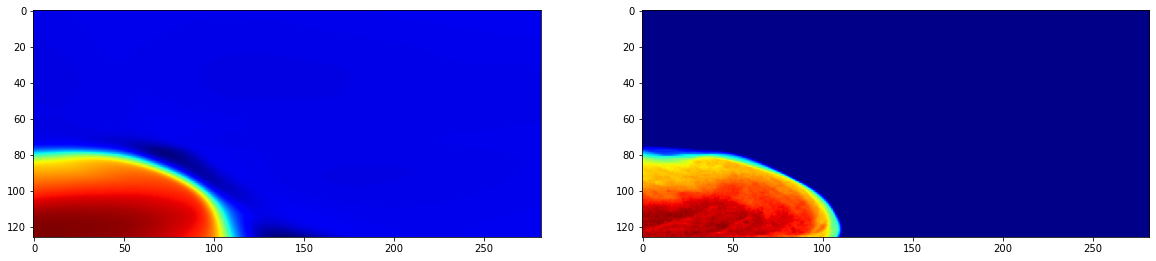

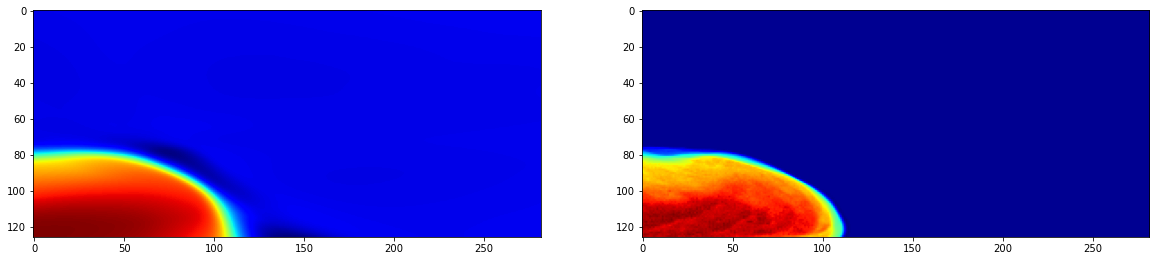

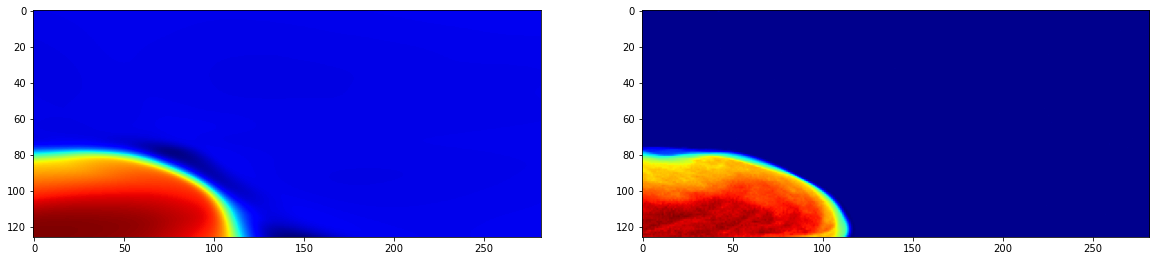

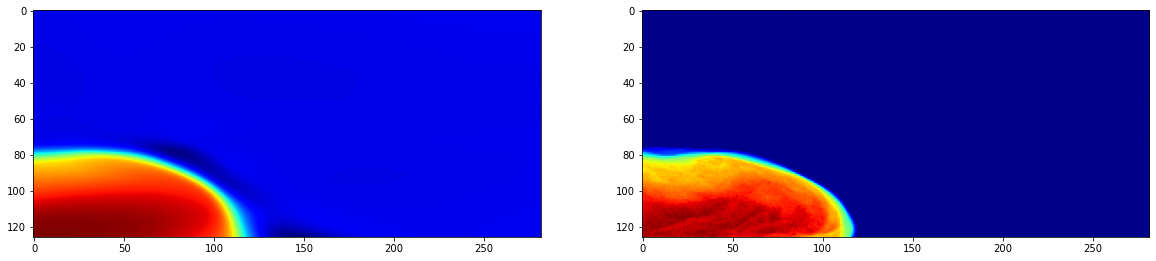

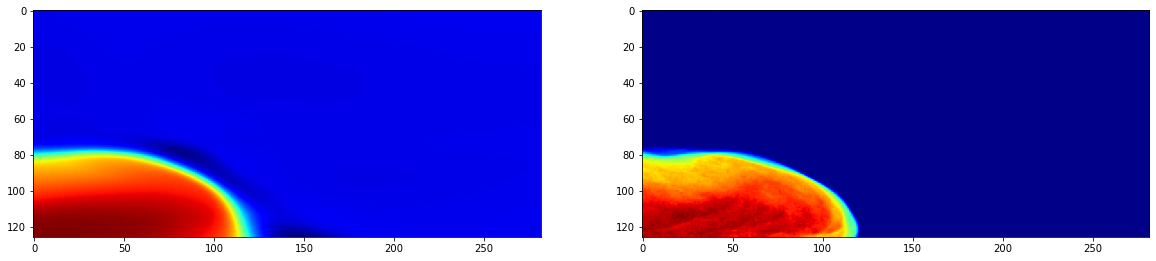

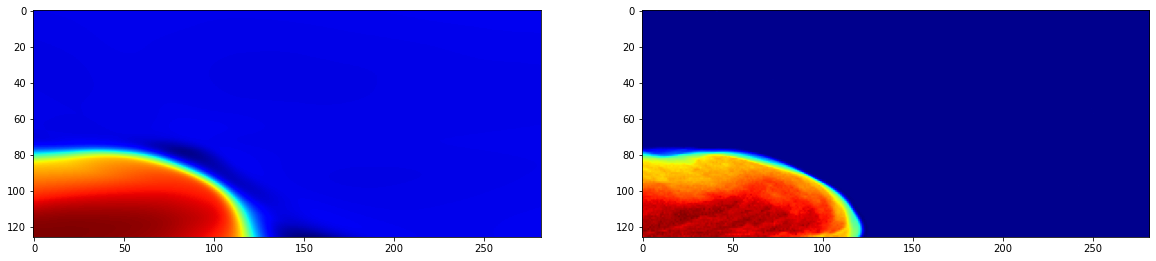

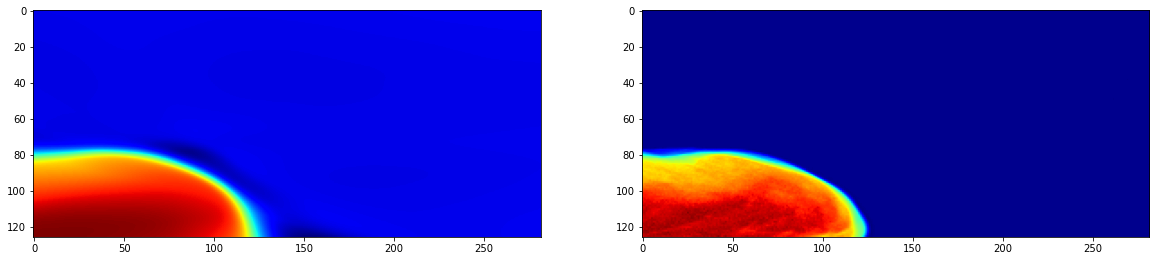

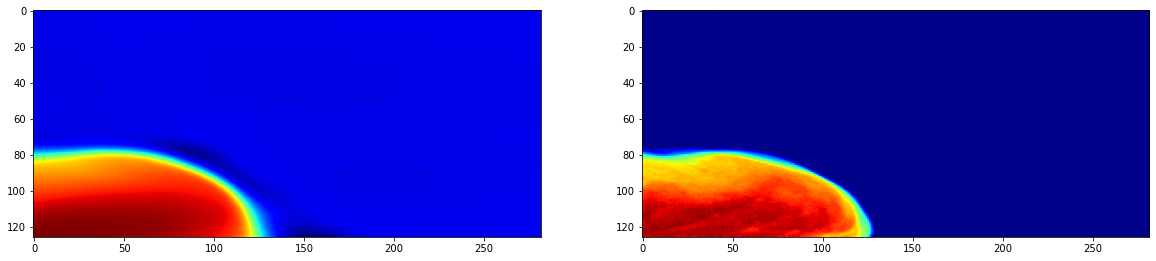

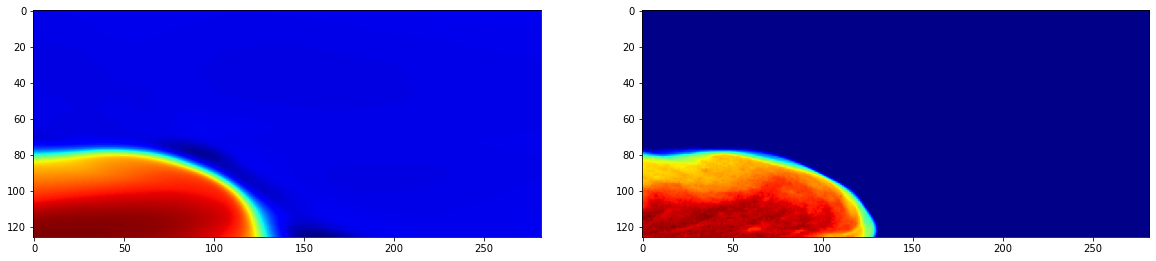

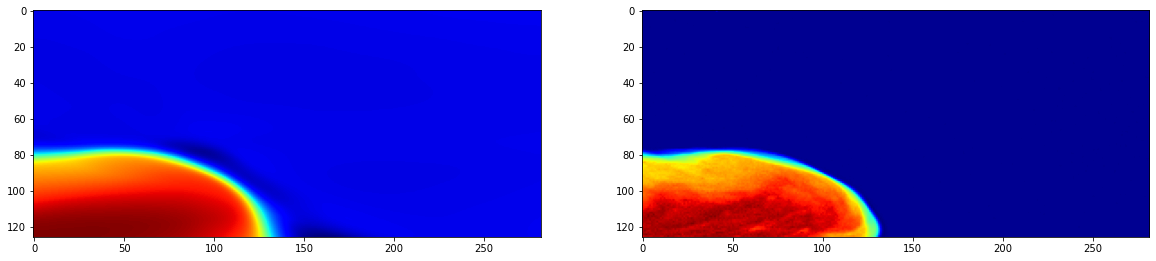

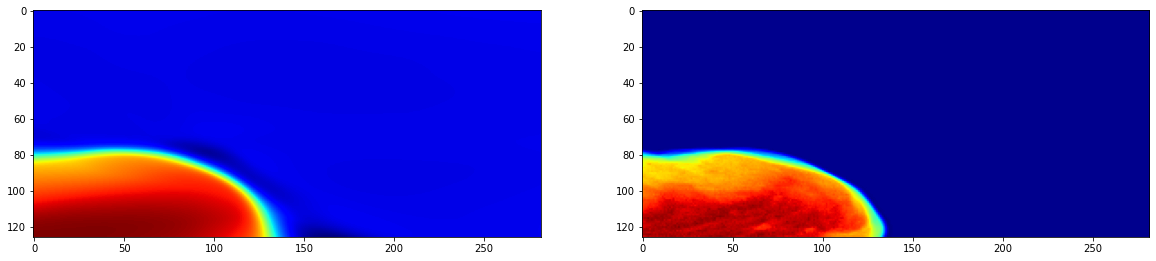

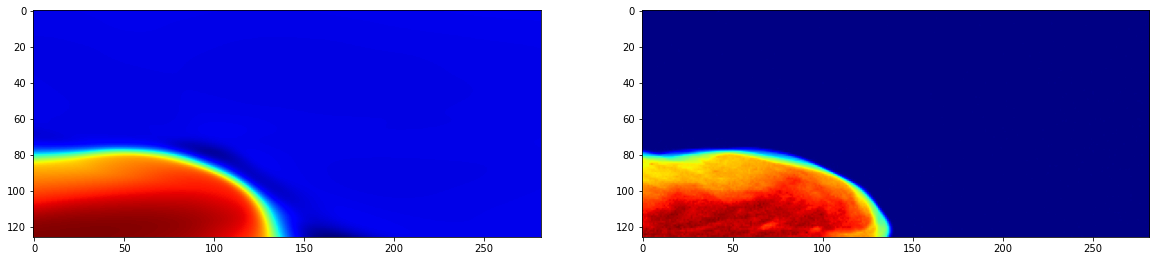

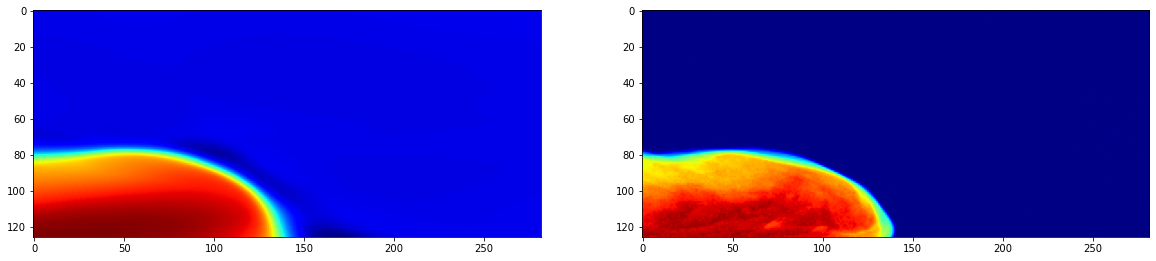

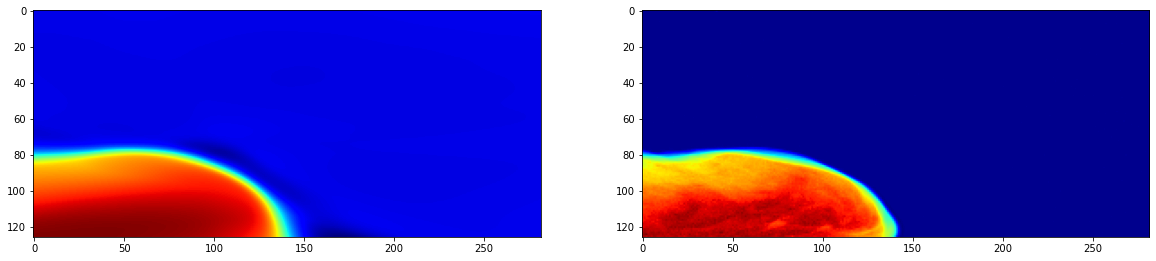

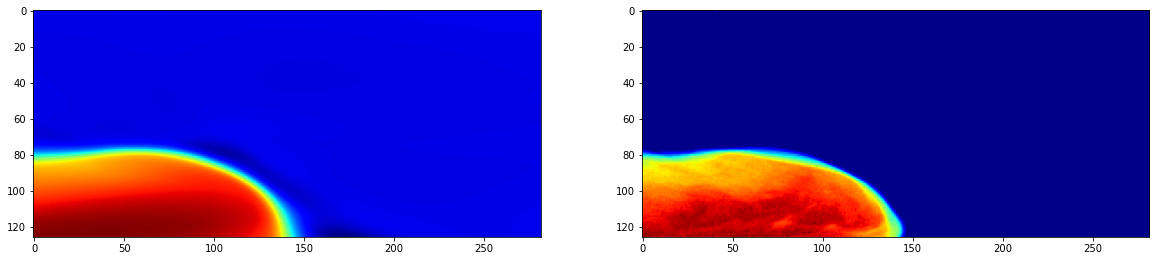

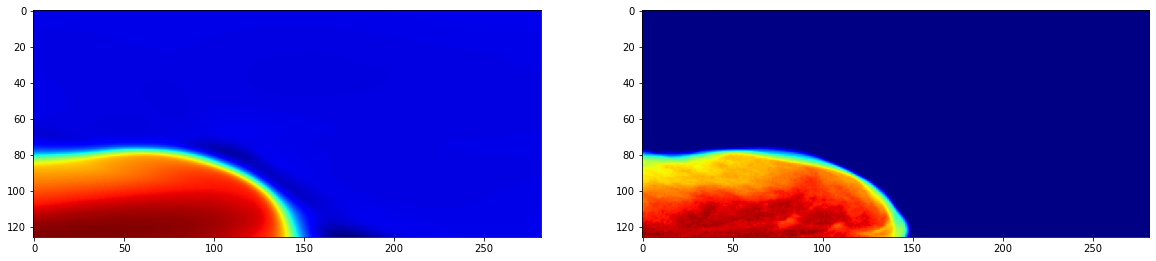

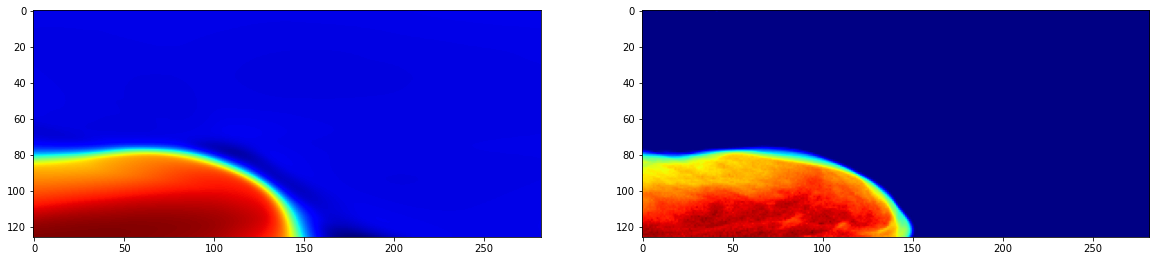

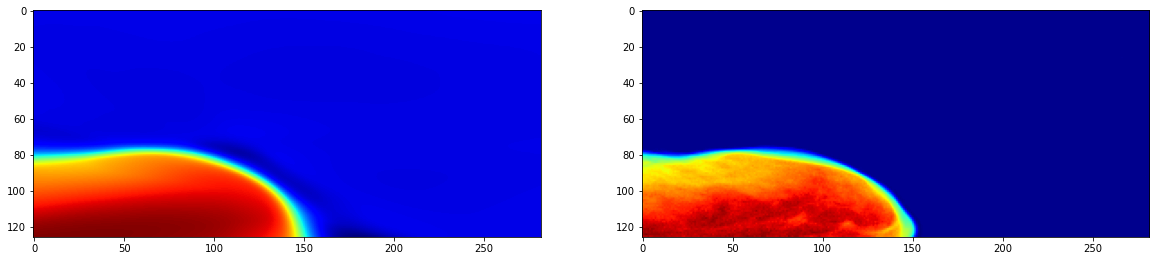

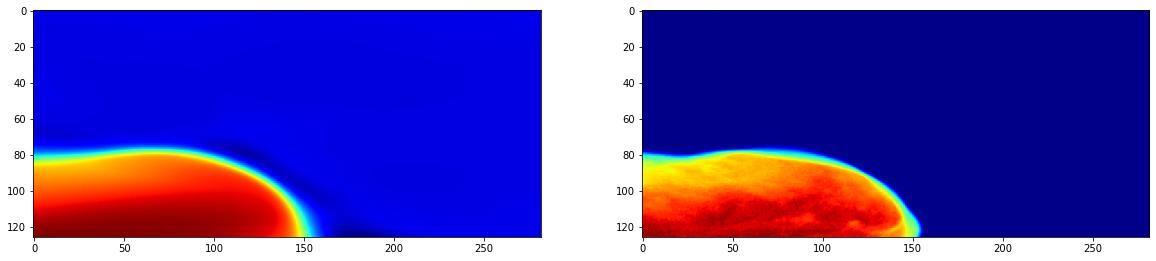

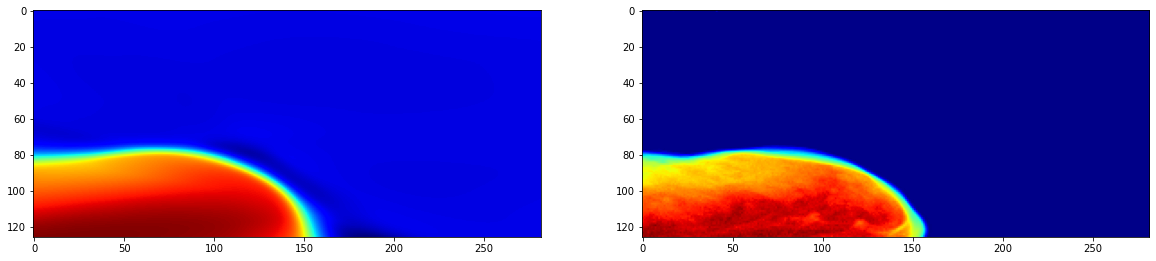

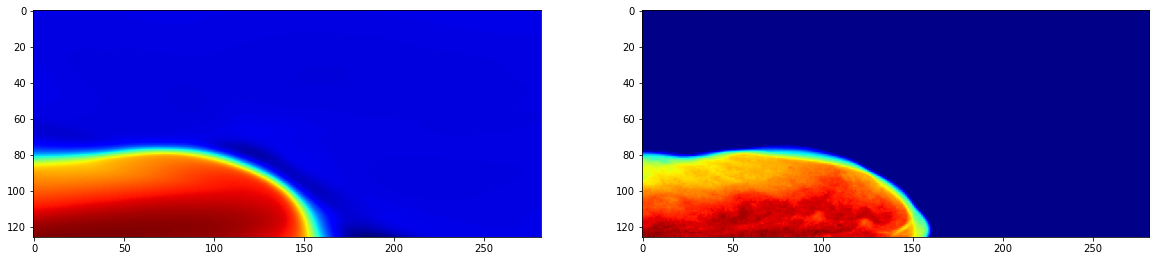

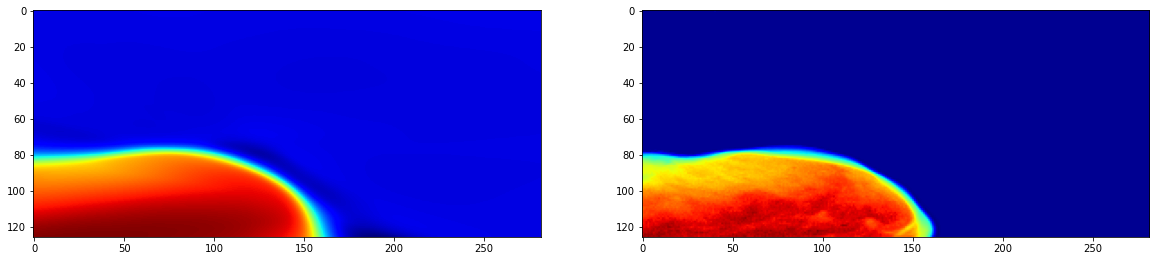

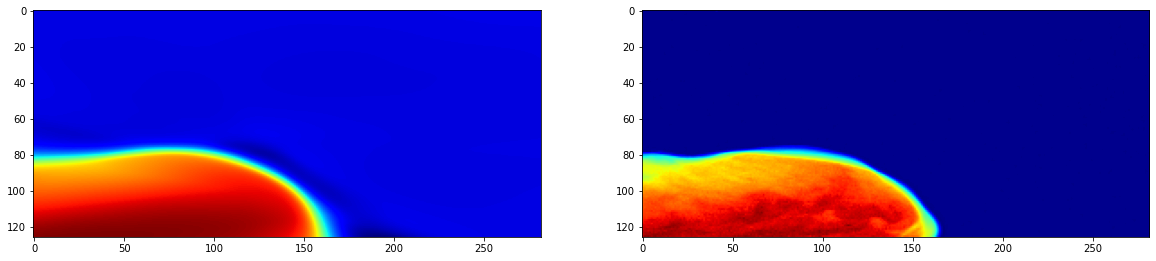

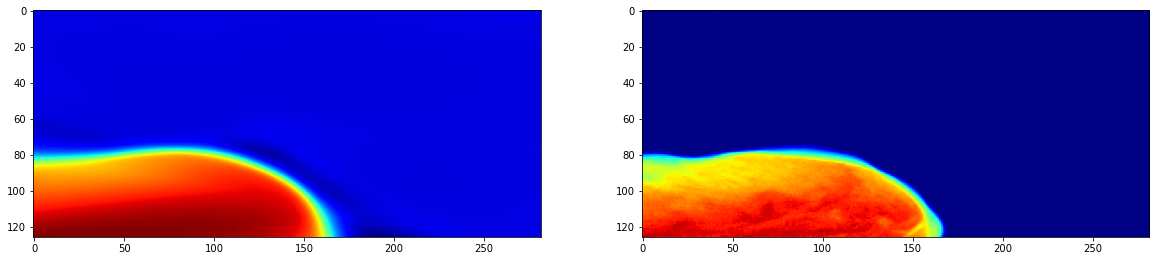

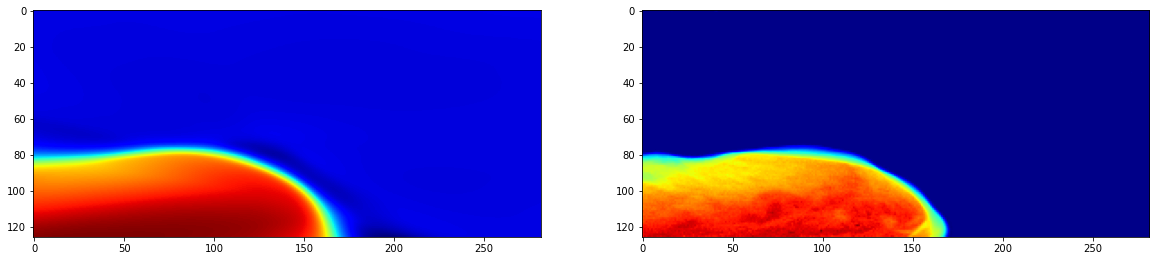

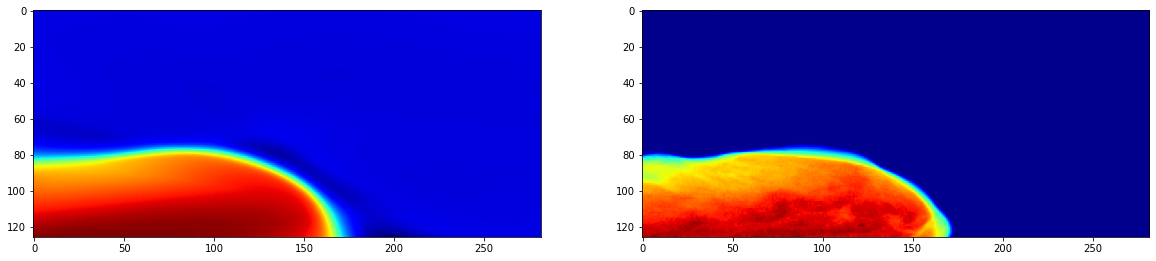

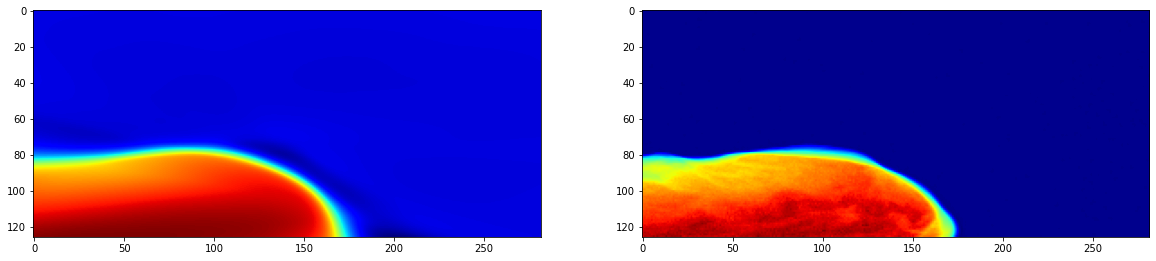

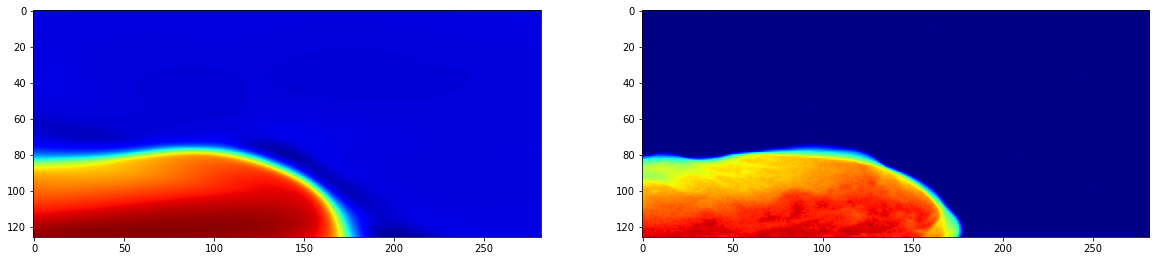

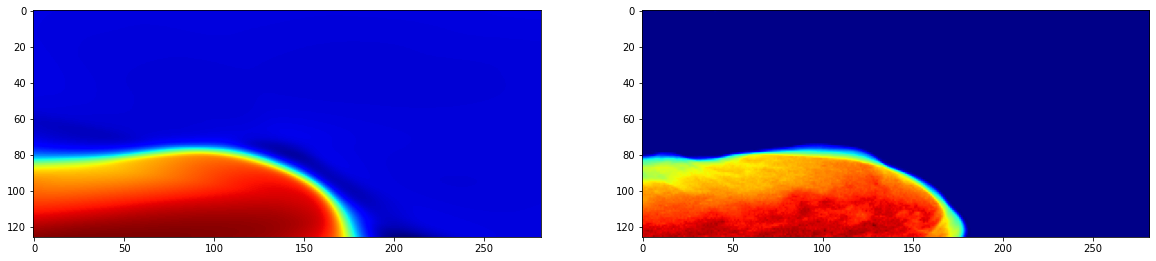

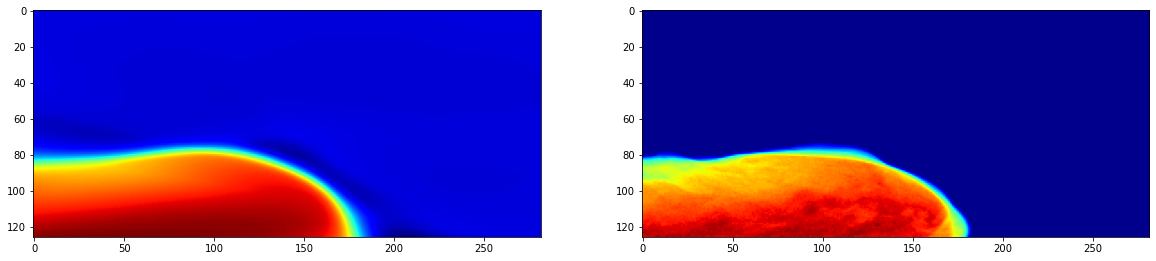

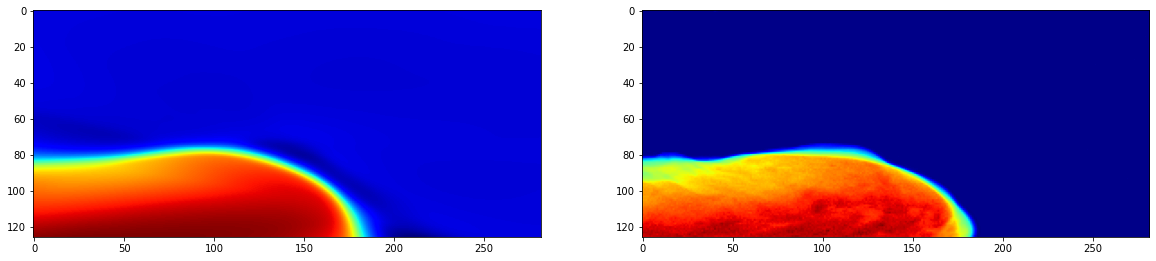

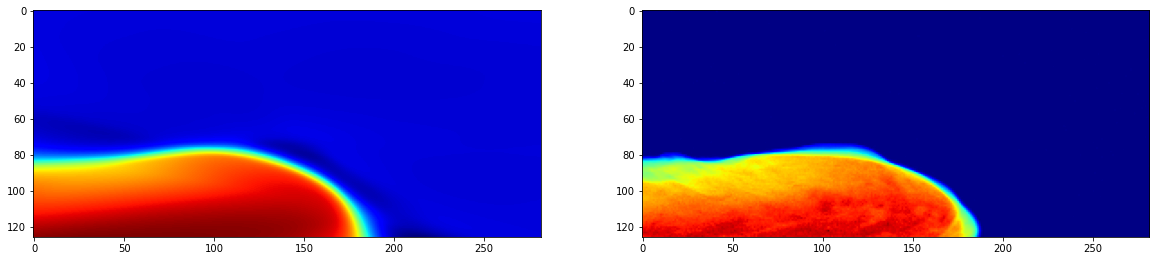

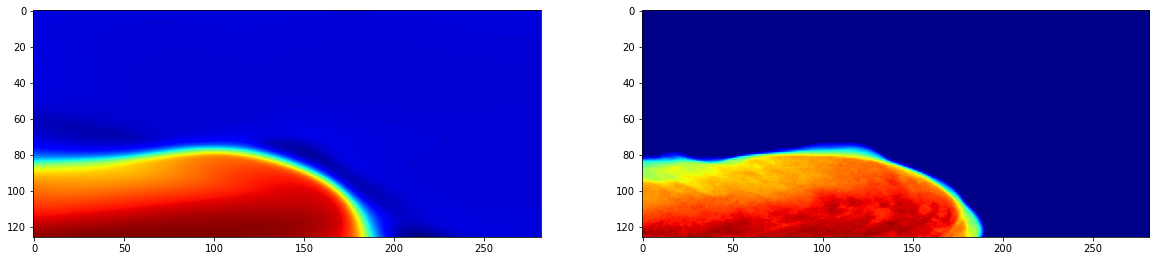

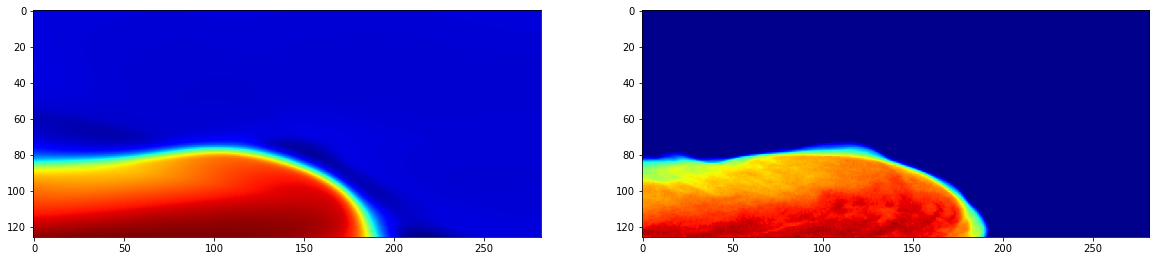

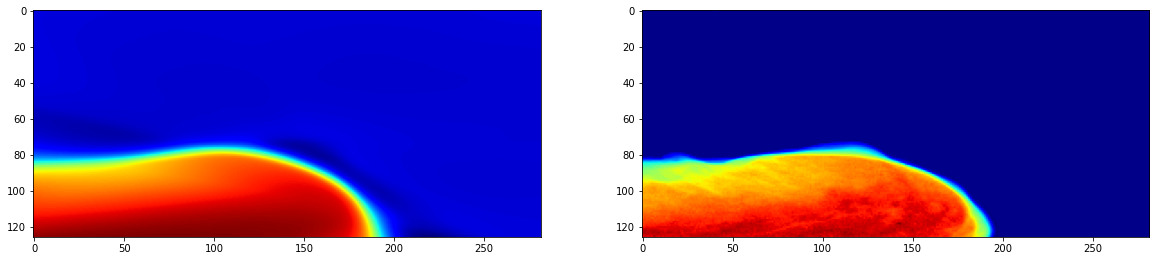

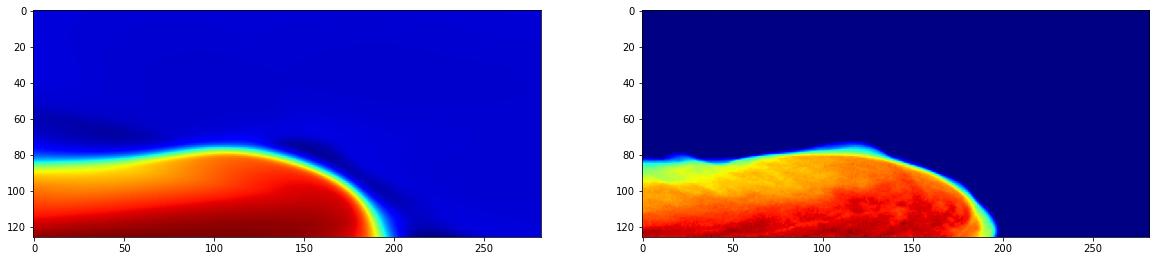

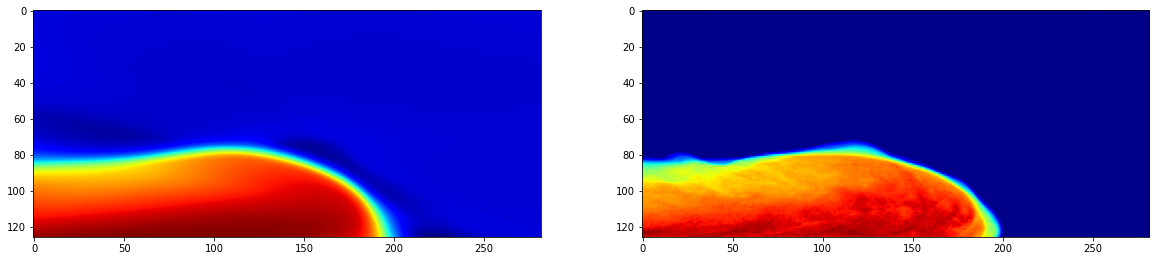

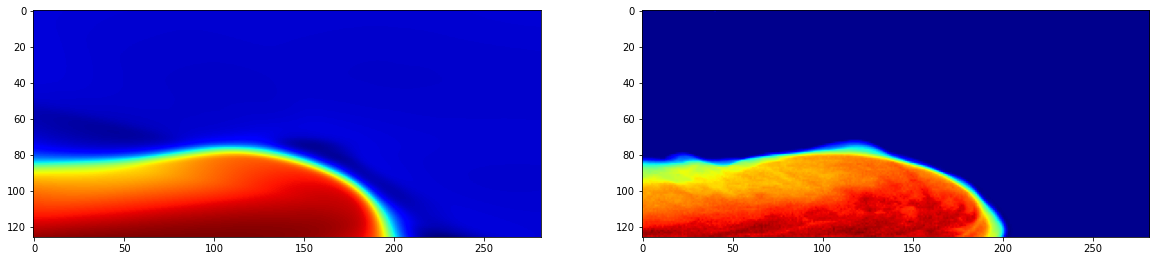

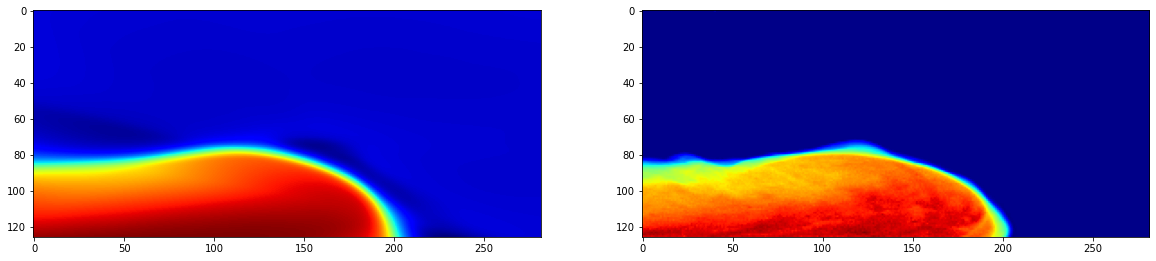

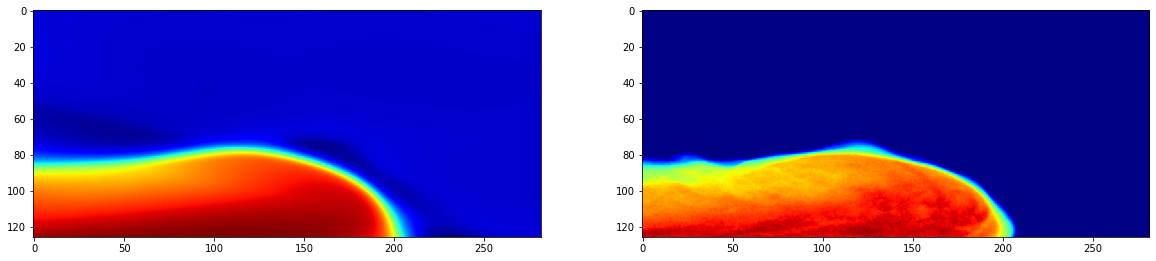

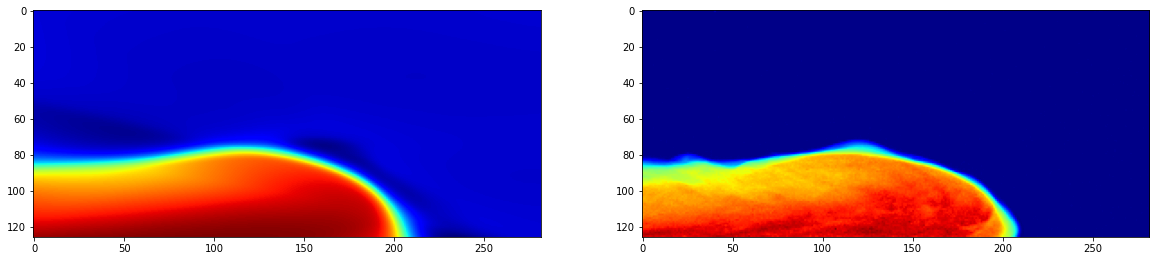

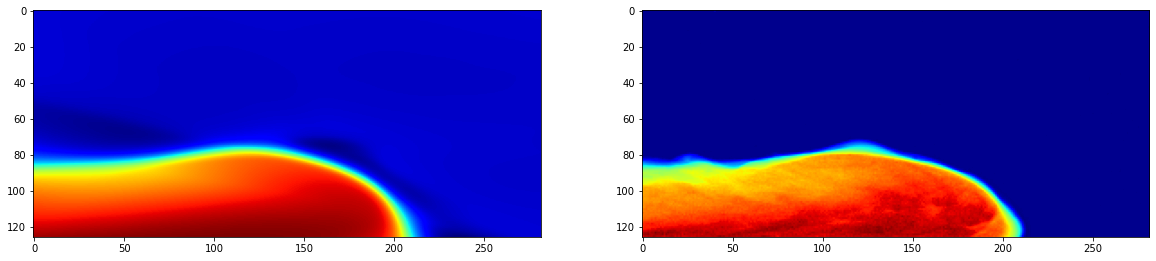

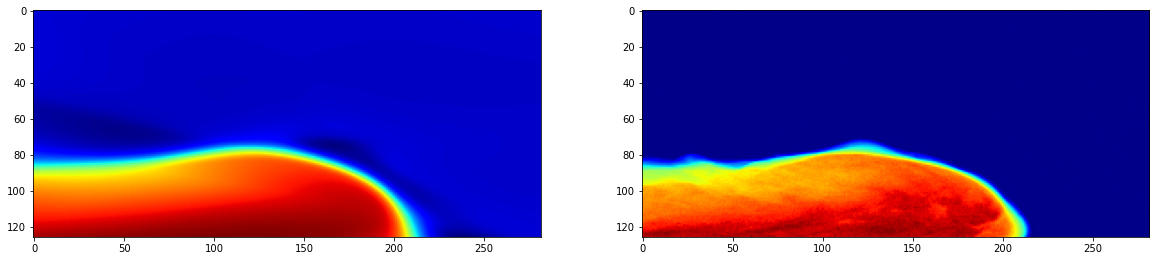

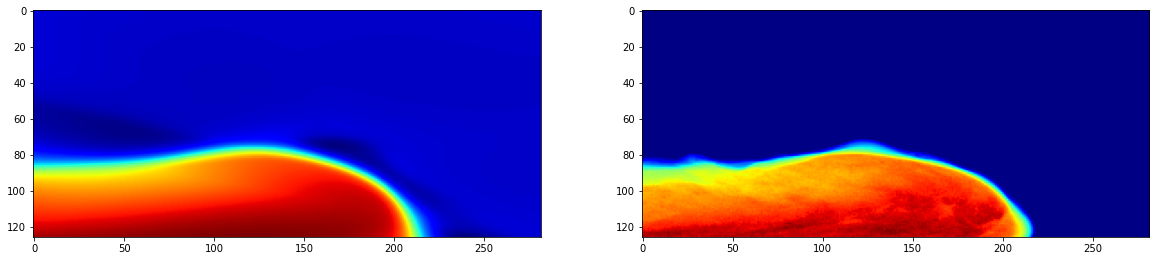

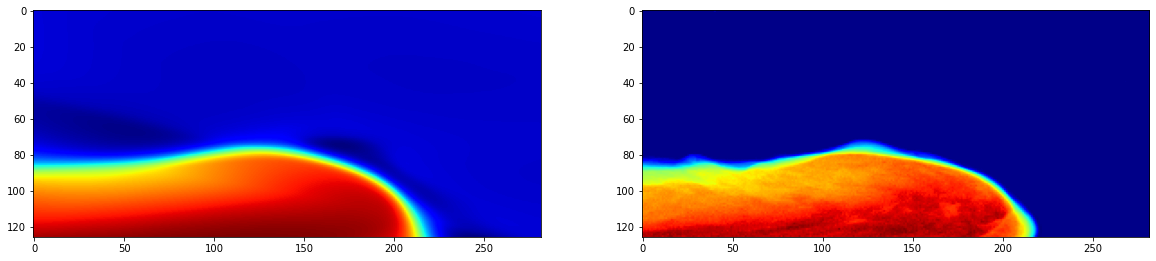

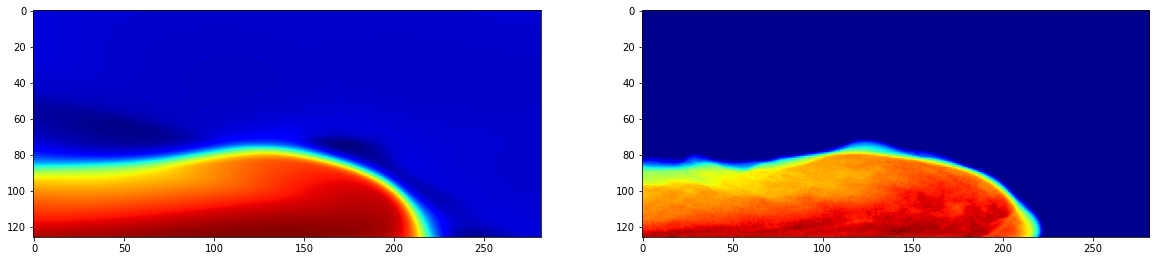

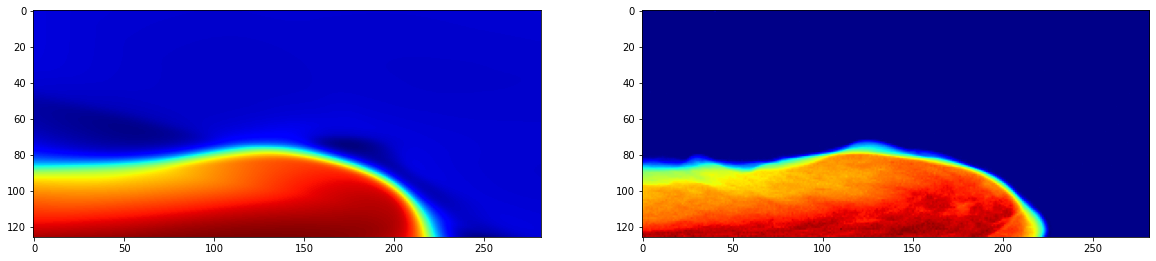

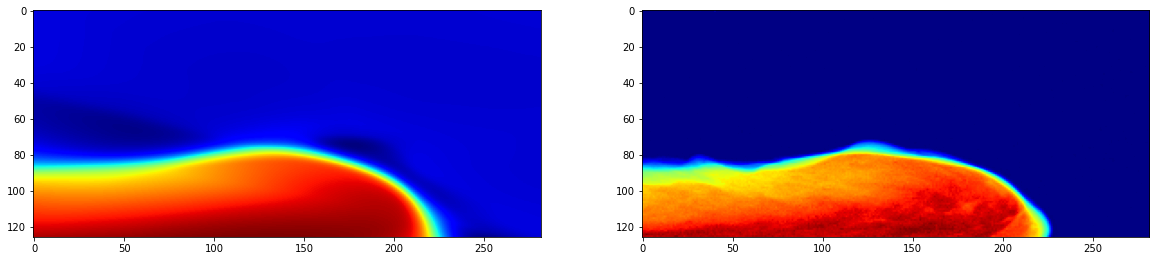

In [25]:
for i in range(0,T_star.shape[1],5):
    fig, (ax,ax1) =plt.subplots(ncols = 2, figsize = (20,12))
    ax.imshow(list_rho_pred[i].reshape(py,px),cmap = cmaps['Miscellaneous'][13])
    ax1.imshow(Rho_star[:,i].reshape(py,px),cmap = cmaps['Miscellaneous'][13])
    plt.show()


In [26]:
model.save('model_rho_newexp_29_04.hf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_rho_newexp_29_04.hf5/assets


In [34]:
model = keras.models.load_model('model_rho_02.hf5')

OSError: SavedModel file does not exist at: model_rho_02.hf5/{saved_model.pbtxt|saved_model.pb}